### 3.3.2 Marginal Distributions

#### Goal:
A **marginal distribution** provides insight into how a single variable behaves, independent of others. Understanding a variable’s distribution is key to segmenting customers and recognizing patterns that influence campaign outcomes.

#### Subsections:
1. **Marginal Distributions Overview**
2. **Distribution Families**
3. **The Normal Distribution**
4. **Skewed and Log-Normal Distributions**
5. **Bernoulli and Binomial Distributions**
6. **Poisson Distribution**
7. **Strategic Use in Campaign Analytics**

---

#### 1. Marginal Distributions Overview:

A **marginal distribution** tells us how the values of a single variable are spread across the dataset. It highlights where most observations lie, as well as the concentration, skewness, and spread. 

For continuous variables like **age**, the distribution is typically visualized using **histograms** or **density curves**. The probability density function (PDF) for a continuous variable **X** satisfies:

$$
\int_{-\infty}^{\infty} f(x)\,dx = 1
$$

Where $f(x)$ is the probability density function and $f(x)dx$ gives the approximate probability of the variable $X$ falling within a small interval around $x$.

#### 2. Distribution Families:

Understanding which **probability distribution** a variable follows is crucial for modeling. Most continuous variables like **age**, **income**, or **balance** typically follow known distributions, such as the **Normal** or **Log-normal** distributions. For binary variables like subscription outcome, the **Bernoulli** distribution is used, and for event counts (e.g., number of calls), the **Poisson** distribution is applicable.

#### 3. The Normal Distribution:

The **Normal distribution** is a widely used distribution in marketing data, especially for continuous variables. It is symmetrical around its mean, and the probability of observing values decreases symmetrically as we move away from the mean. Its probability density function is:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

Where:
- $\mu$ is the mean.
- $\sigma$ is the standard deviation.

The key property of the Normal distribution is that:
- **68%** of observations lie within one standard deviation from the mean.
- **95%** of observations lie within two standard deviations.
- **99.7%** of observations lie within three standard deviations.

#### 4. Skewed and Log-Normal Distributions:

Many marketing variables, such as **income** or **contact duration**, are **right-skewed**. This means most values are smaller, but a few extremely large values dominate the distribution. The **log-normal distribution** is often used for such variables, where the logarithm of the variable is normally distributed.

The **log-normal distribution** has the probability density function:

$$
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}, \quad x > 0
$$

#### 5. Bernoulli and Binomial Distributions:

The outcome variable in a campaign is **binary** (either a customer subscribes or does not). This follows the **Bernoulli distribution** with parameter $p$ (the probability of success):

$$
P(Y=1) = p, \quad P(Y=0) = 1 - p
$$

For multiple trials, the **Binomial distribution** describes the number of successes in $n$ independent Bernoulli trials:

$$
P(K = k) = \binom{n}{k} p^k (1 - p)^{n-k}
$$

#### 6. Poisson Distribution:

For variables describing counts, such as **number of calls** or **previous contacts**, we use the **Poisson distribution**. The probability of observing $k$ events in a fixed period, where events occur independently at a constant rate $\lambda$, is given by:

$$
P(K = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

Where $\lambda$ is the mean and variance of the distribution.

#### 7. Strategic Use in Campaign Analytics:

Understanding the distribution of variables allows us to make better strategic decisions in campaign design. For example:
- For **normal distributions**, use the **mean** and **standard deviation** to set thresholds.
- For **skewed or log-normal distributions**, use the **median** and transform the data before modeling.
- For **Poisson distributions**, use the  rate $ \lambda$  to forecast expected workload.

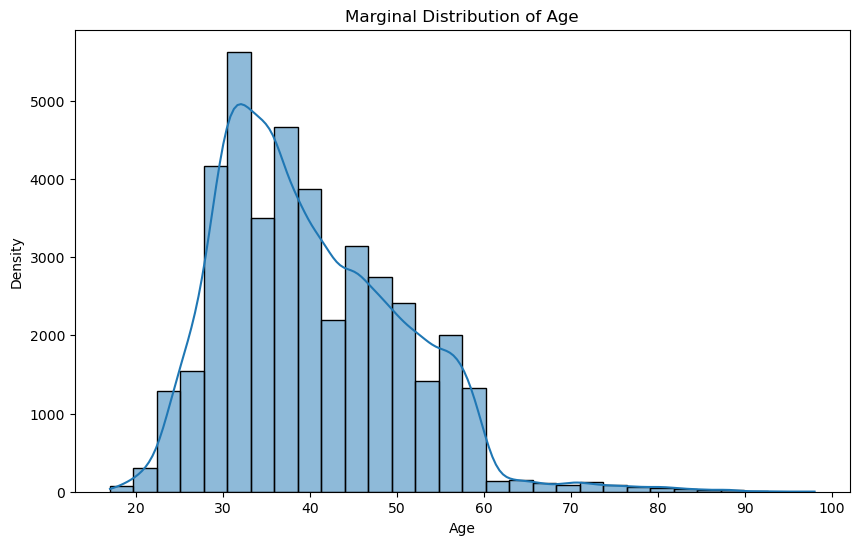

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Step 1: Marginal Distribution of Age (Histogram and Density Plot)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Marginal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### 3.3.2.1 Distribution Families

#### Goal:
Every variable in a campaign dataset follows a probability distribution. By understanding which distribution a variable follows, we can make more informed modeling decisions. We’ll focus on **Normal**, **Log-Normal**, and **Skewed distributions** and visualize them with synthetic data.

#### Key Distributions:

1. **Normal Distribution**:
   - The **Normal distribution** is symmetric, with most values clustering around the mean.
   - Common in many continuous marketing variables (e.g., age, balance).
   - Its **probability density function (PDF)** is given by:
   $$
   f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
   $$

2. **Log-Normal Distribution**:
   - The **Log-Normal distribution** is right-skewed.
   - Often observed in marketing data for variables like **income** or **balance**, where a few large values dominate.
   - It’s generated by taking the natural logarithm of a normally distributed variable:
   $$
   f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}, \quad x > 0
   $$

3. **Skewed Distribution**:
   - Variables like **balance** and **contact duration** are often **skewed** (right-skewed in particular).
   - In a **right-skewed distribution**, most values are small, and only a few values are very large, affecting the mean.

#### Visualizing These Distributions:

We’ll generate synthetic data for these distributions and visualize them to better understand their properties.

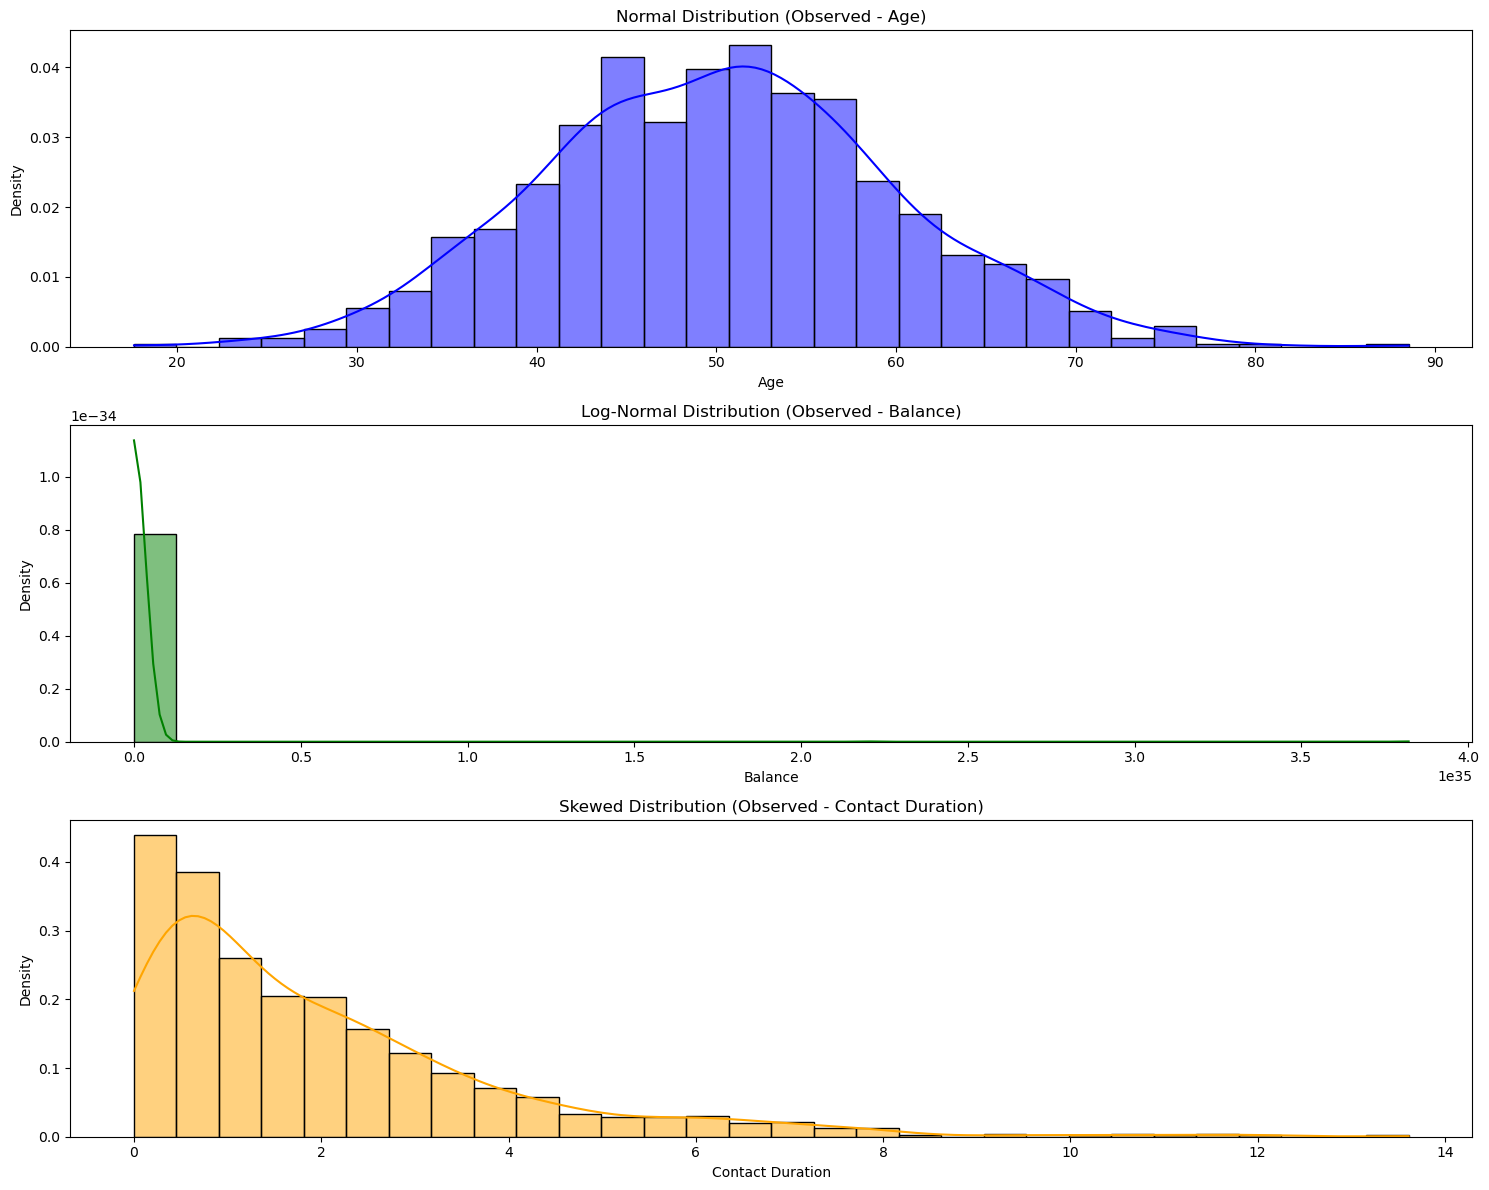

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n = 1000

# 1. Normal Distribution (e.g., Age)
mu, sigma = 50, 10  # Mean and standard deviation
normal_data = np.random.normal(mu, sigma, n)

# 2. Log-Normal Distribution (e.g., Balance)
log_normal_data = np.random.lognormal(mean=mu, sigma=sigma, size=n)

# 3. Skewed Distribution (e.g., Contact Duration)
skewed_data = np.random.chisquare(df=2, size=n)

# Set up the figure for subplots
plt.figure(figsize=(15, 12))

# Plot Normal Distribution (Observed)
plt.subplot(3, 1, 1)
sns.histplot(normal_data, kde=True, color="blue", bins=30, stat="density")
plt.title('Normal Distribution (Observed - Age)')
plt.xlabel('Age')
plt.ylabel('Density')

# Plot Log-Normal Distribution (Observed)
plt.subplot(3, 1, 2)
sns.histplot(log_normal_data, kde=True, color="green", bins=30, stat="density")
plt.title('Log-Normal Distribution (Observed - Balance)')
plt.xlabel('Balance')
plt.ylabel('Density')

# Plot Skewed Distribution (Observed)
plt.subplot(3, 1, 3)
sns.histplot(skewed_data, kde=True, color="orange", bins=30, stat="density")
plt.title('Skewed Distribution (Observed - Contact Duration)')
plt.xlabel('Contact Duration')
plt.ylabel('Density')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### 3.3.2.2 The Normal Distribution

#### Goal:
The **Normal distribution** is one of the most important and commonly encountered probability distributions in data analysis. Many continuous marketing variables like **age**, **balance**, or **income** approximate this form of distribution. 

#### Key Properties:
- **Symmetry**: The Normal distribution is symmetrical around the mean.
- **Concentration Around the Mean**: Most observations cluster near the mean, with fewer extreme values.
- **68-95-99.7 Rule**: In a **Normal distribution**, about:
  - **68%** of the values lie within one standard deviation of the mean.
  - **95%** lie within two standard deviations.
  - **99.7%** lie within three standard deviations.

The **probability density function (PDF)** of a Normal distribution is given by:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

Where:
- $\mu$ is the mean (average).
- $\sigma$ is the standard deviation (spread of the data).

#### Why Does This Matter in Campaign Analytics?
Understanding that a variable follows a **Normal distribution** helps in several ways:
1. **Predictability**: Normal distributions are predictable. Most customers will behave similarly to the mean, which helps in forecasting and resource planning.
2. **Simplifying Assumptions**: Many statistical techniques assume normality because it implies predictable behavior. This simplifies modeling.
3. **Outlier Detection**: Any data points significantly far from the mean (typically beyond 2 or 3 standard deviations) can be considered outliers, which are important for marketing strategies.

#### Example in Campaign Data:
For example, the **age** distribution of customers is often **Normal**. Most clients are near the average age, with fewer extreme young or old clients. This symmetry makes it easier to predict customer behavior and decide where to focus marketing efforts.

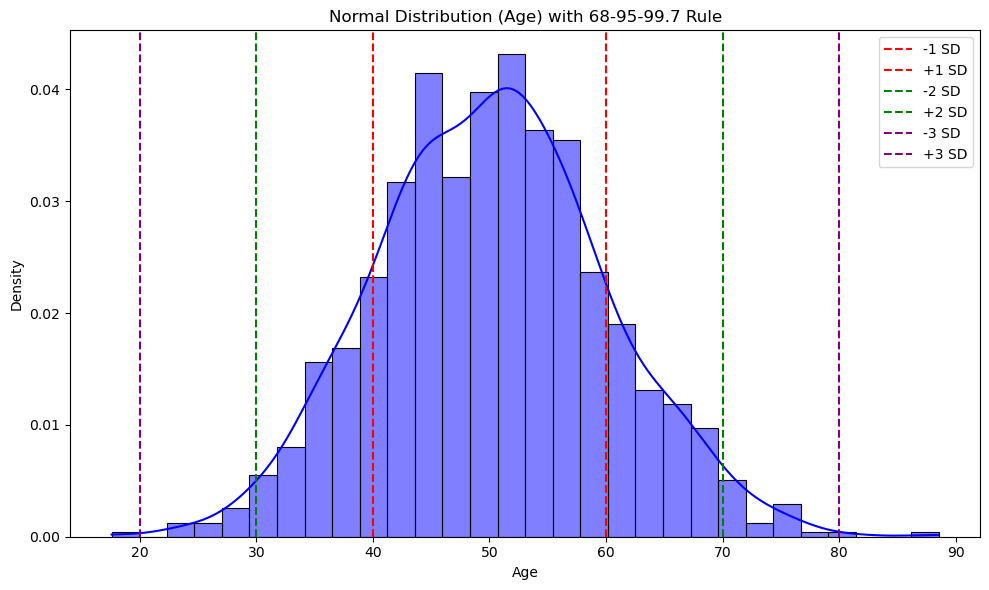

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n = 1000

# Normal Distribution parameters
mu, sigma = 50, 10  # Mean and standard deviation
normal_data = np.random.normal(mu, sigma, n)

# Plot the Normal Distribution
plt.figure(figsize=(10, 6))

# Histogram and KDE (Kernel Density Estimate)
sns.histplot(normal_data, kde=True, color="blue", bins=30, stat="density", linewidth=0.8)

# Add the 68-95-99.7 rule lines
plt.axvline(mu - sigma, color="red", linestyle="--", label="-1 SD")
plt.axvline(mu + sigma, color="red", linestyle="--", label="+1 SD")
plt.axvline(mu - 2*sigma, color="green", linestyle="--", label="-2 SD")
plt.axvline(mu + 2*sigma, color="green", linestyle="--", label="+2 SD")
plt.axvline(mu - 3*sigma, color="purple", linestyle="--", label="-3 SD")
plt.axvline(mu + 3*sigma, color="purple", linestyle="--", label="+3 SD")

# Add Title and Labels
plt.title('Normal Distribution (Age) with 68-95-99.7 Rule')
plt.xlabel('Age')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### 3.3.2.3 Skewed and Log-Normal Distributions

#### Goal:
In campaign analytics, many variables, such as **income**, **balance**, or **contact duration**, exhibit **right-skewed distributions**. These are distributions where most of the data points are clustered near the lower end of the scale, with a small number of high-value outliers creating a long **right tail**.

#### Key Points:
1. **Skewed Distributions**:
   - A **skewed distribution** occurs when one tail is longer than the other. In marketing data, right-skewed distributions are common, where the majority of values are small, and a few extreme values dominate the distribution.
   - In a **right-skewed** distribution, most clients are in the lower range, and only a few have higher values (e.g., clients with high income or very high balances).

2. **Log-Normal Distribution**:
   - The **Log-Normal distribution** is a specific form of a right-skewed distribution. It occurs when the natural logarithm of the data is normally distributed.
   - Many financial variables, such as **balance**, follow this distribution because they are positively skewed, with a **long right tail**.
   
   The **probability density function (PDF)** for the log-normal distribution is:

   $$
   f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}, \quad x > 0
   $$

   Where:
   -  $\mu$ is the mean of the natural log of the data.
   - $\sigma$ is the standard deviation of the natural log of the data.

#### Why Does This Matter in Campaign Analytics?
- **Right-skewed distributions** are common in campaign analytics. For example, a small number of customers might hold most of the wealth or contribute to most of the value.
- **Log-normal distributions** often appear when the data is related to **multiplicative** processes, where values grow exponentially rather than linearly. Recognizing these distributions helps marketers understand where the value lies in the long tail and design targeted strategies.

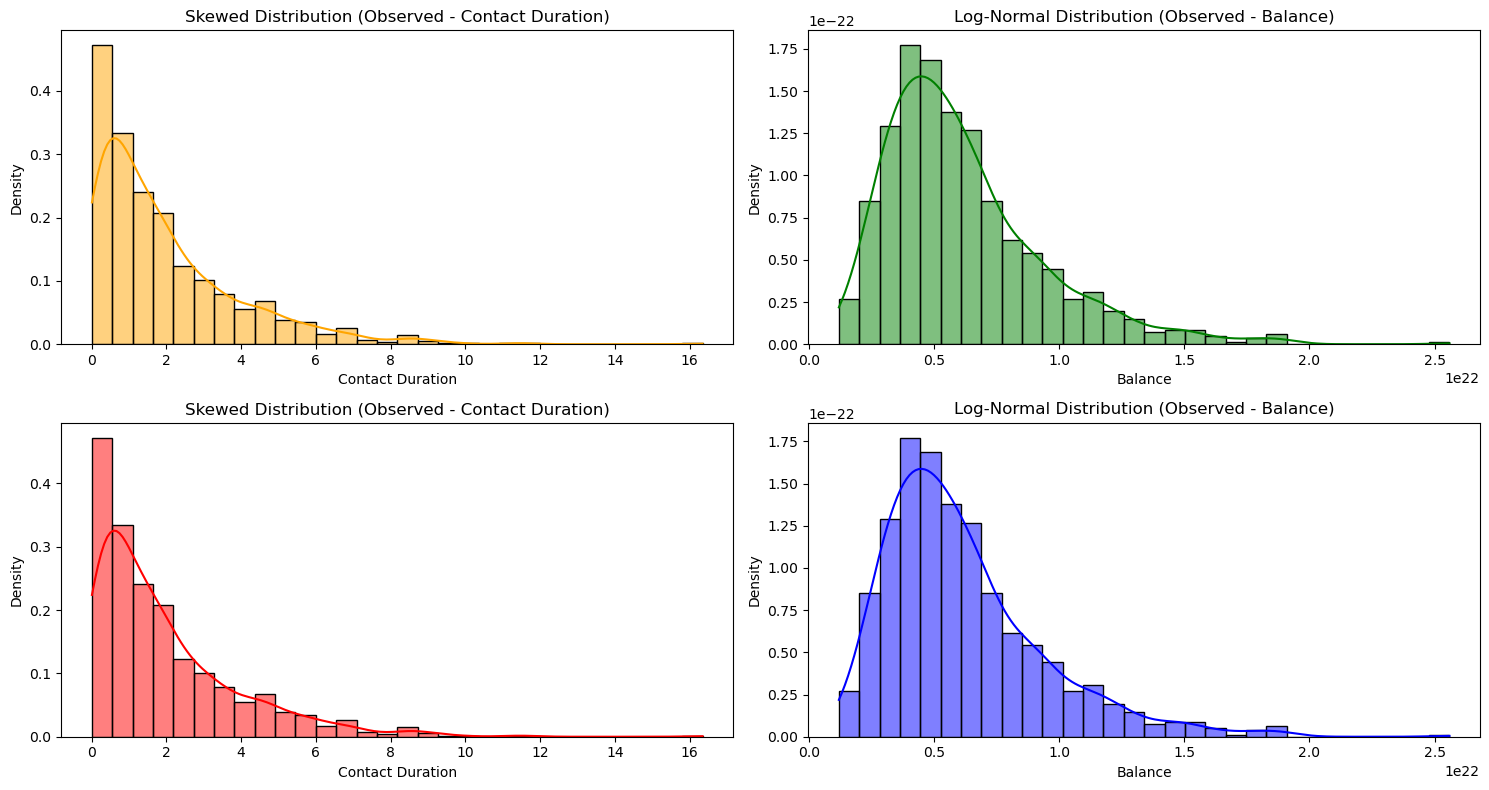

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n = 1000

# 1. Skewed Distribution (e.g., Contact Duration)
skewed_data = np.random.chisquare(df=2, size=n)

# 2. Log-Normal Distribution (e.g., Balance)
mu, sigma = 50, 0.5  # Mean and standard deviation for the log-normal
log_normal_data = np.random.lognormal(mean=mu, sigma=sigma, size=n)

# Set up the figure for subplots
plt.figure(figsize=(15, 8))

# Plot Skewed Distribution (Observed)
plt.subplot(2, 2, 1)
sns.histplot(skewed_data, kde=True, color="orange", bins=30, stat="density")
plt.title('Skewed Distribution (Observed - Contact Duration)')
plt.xlabel('Contact Duration')
plt.ylabel('Density')

# Plot Log-Normal Distribution (Observed)
plt.subplot(2, 2, 2)
sns.histplot(log_normal_data, kde=True, color="green", bins=30, stat="density")
plt.title('Log-Normal Distribution (Observed - Balance)')
plt.xlabel('Balance')
plt.ylabel('Density')

# Plot Skewness of Skewed Data
plt.subplot(2, 2, 3)
sns.histplot(skewed_data, kde=True, color="red", bins=30, stat="density")
plt.title('Skewed Distribution (Observed - Contact Duration)')
plt.xlabel('Contact Duration')
plt.ylabel('Density')

# Plot Log-Normal Fit
plt.subplot(2, 2, 4)
sns.histplot(log_normal_data, kde=True, color="blue", bins=30, stat="density")
plt.title('Log-Normal Distribution (Observed - Balance)')
plt.xlabel('Balance')
plt.ylabel('Density')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### 3.3.2.4 Bernoulli and Binomial Distributions

#### Goal:
In marketing analytics, many outcomes are **binary** — a customer either subscribes to a product or does not. These types of outcomes are naturally modeled by the **Bernoulli distribution**. When we have multiple independent trials, the **Binomial distribution** comes into play.

#### Key Points:

1. **Bernoulli Distribution**:
   - The **Bernoulli distribution** describes the probability of a **single trial** with two possible outcomes: success $ y = 1 $ or failure $ y = 0 $.
   - The distribution is defined by a single parameter, $ p $, which is the probability of success (e.g., the probability that a customer subscribes).

   The **probability mass function (PMF)** for the Bernoulli distribution is:

   $$
   P(Y = 1) = p, \quad P(Y = 0) = 1 - p
   $$

   Where $ Y $ is the binary outcome.

2. **Binomial Distribution**:
   - The **Binomial distribution** generalizes the **Bernoulli distribution** to multiple trials. It gives the probability of having exactly $ k $ successes in $ n $ independent trials, where each trial follows a Bernoulli distribution.
   - The **Binomial distribution** is parameterized by:
     - $ n $: Number of trials.
     - $ p $: Probability of success in each trial.

   The **probability mass function (PMF)** for the Binomial distribution is:

   $$
   P(K = k) = \binom{n}{k} p^k (1 - p)^{n - k}
   $$

   Where:
   - $ K $ is the number of successes,
   - $ k $ is the number of successes we want,
   - $ p $ is the probability of success in each trial.

#### Why Does This Matter in Campaign Analytics?
- **Bernoulli distributions** are used when considering a **single customer’s response** to a campaign, like whether they will subscribe or not.
- **Binomial distributions** are useful when evaluating multiple trials or contacts, such as when assessing how many successful subscriptions occur in a campaign with multiple customer contacts.
- Both distributions are essential when dealing with **binary outcomes**, like subscription or purchase decisions.

/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_45066/1889401566.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bernoulli_data, palette="Blues")


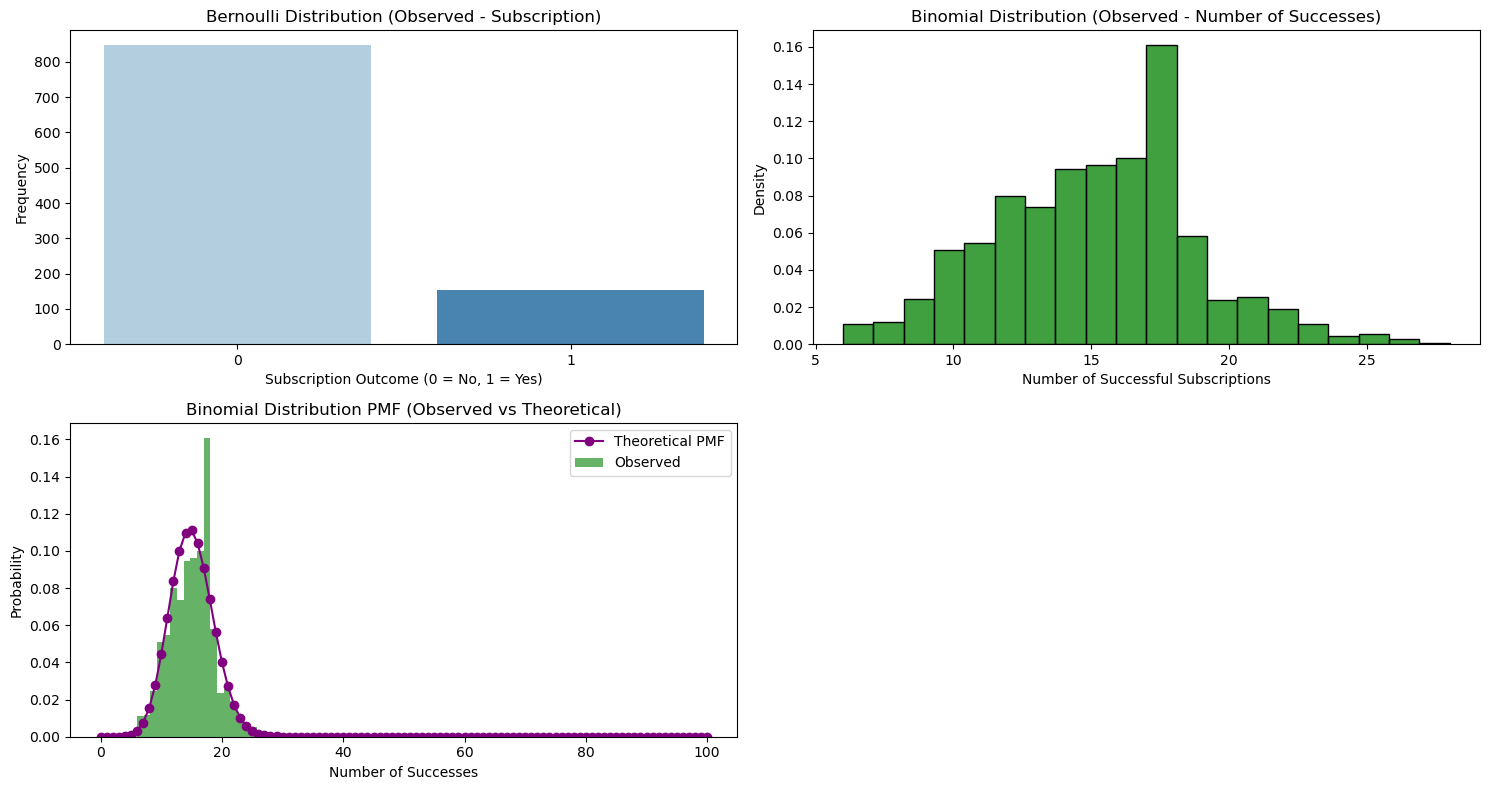

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special  # Import scipy.special for the comb function

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n = 1000

# 1. Bernoulli Distribution
p_bernoulli = 0.15  # Probability of success (subscription)
bernoulli_data = np.random.binomial(1, p_bernoulli, n)  # Generate Bernoulli trials (0 or 1)

# 2. Binomial Distribution
n_trials = 100  # Number of trials (e.g., 100 contacts)
p_binomial = 0.15  # Probability of success in each trial
binomial_data = np.random.binomial(n_trials, p_binomial, n)  # Generate Binomial outcomes (number of successes)

# Set up the figure for subplots
plt.figure(figsize=(15, 8))

# Plot Bernoulli Distribution (Observed)
plt.subplot(2, 2, 1)
sns.countplot(x=bernoulli_data, palette="Blues")
plt.title('Bernoulli Distribution (Observed - Subscription)')
plt.xlabel('Subscription Outcome (0 = No, 1 = Yes)')
plt.ylabel('Frequency')

# Plot Binomial Distribution (Observed)
plt.subplot(2, 2, 2)
sns.histplot(binomial_data, kde=False, color="green", bins=20, stat="density")
plt.title('Binomial Distribution (Observed - Number of Successes)')
plt.xlabel('Number of Successful Subscriptions')
plt.ylabel('Density')

# Plot the theoretical Binomial Distribution for comparison
# Using scipy.special.comb instead of np.math.comb
binomial_pmf = np.array([special.comb(n_trials, k) * p_binomial**k * (1-p_binomial)**(n_trials-k) for k in range(n_trials+1)])

plt.subplot(2, 2, 3)
plt.plot(range(n_trials+1), binomial_pmf, marker='o', color="purple", label="Theoretical PMF")
plt.hist(binomial_data, bins=20, density=True, color="green", alpha=0.6, label="Observed")
plt.title('Binomial Distribution PMF (Observed vs Theoretical)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### 3.3.2.5 Poisson Distribution

#### Goal:
The **Poisson distribution** is widely used in marketing analytics to model the number of events (such as customer responses or interactions) occurring in a fixed period of time or space. The events must occur independently, and the average rate of occurrence \( \lambda \) is constant.

#### Key Points:

1. **Poisson Distribution**:
   - It models the **count of events** happening in a fixed interval, given the average rate $\lambda $.
   - The probability of observing $ k $ events in a given interval is given by:

   $$
   P(K = k) = \frac{e^{-\lambda} \lambda^k}{k!}
   $$

   Where:
   - $ K $ is the number of events (e.g., number of calls, responses).
   - $\lambda$ is the average rate of events per interval (e.g., the average number of calls made).
   - $k! $ is the factorial of $k$, which accounts for all possible orderings of events.

2. **Why It Matters in Campaign Analytics**:
   - The **Poisson distribution** is ideal for modeling **discrete events** like the number of times a customer is contacted or the number of responses to a campaign.
   - It helps us understand **expected workloads**, such as how many **calls** or **emails** a campaign might require on average.
   - The **Poisson distribution** also helps identify **unusual behavior**, such as customers receiving **abnormally high contact rates**.

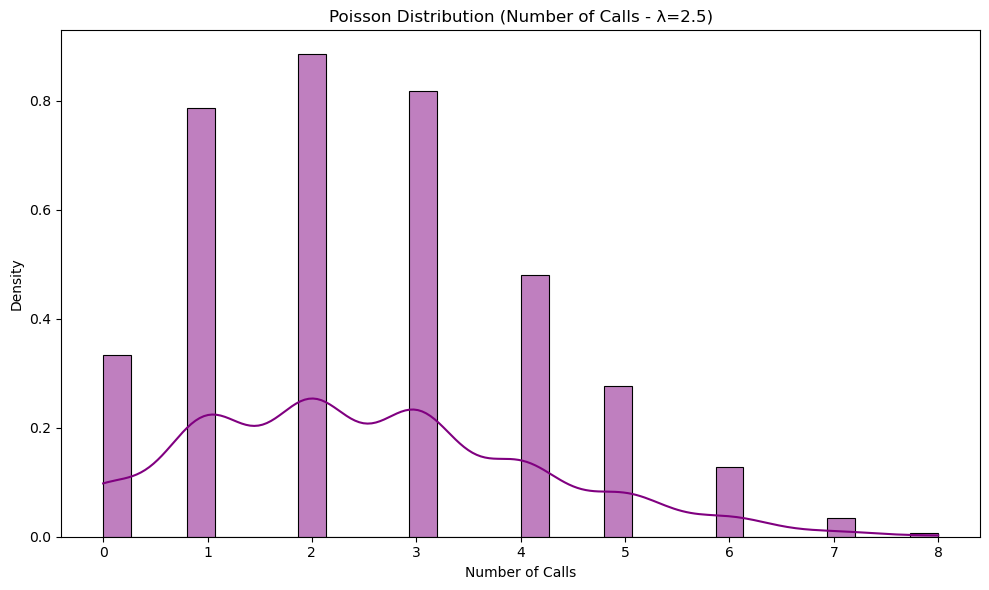

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n = 1000

# Poisson Distribution Parameters
lambda_poisson = 2.5  # Average rate of events (e.g., average number of calls per customer)

# Generate Poisson-distributed data
poisson_data = np.random.poisson(lambda_poisson, n)

# Plot the Poisson Distribution
plt.figure(figsize=(10, 6))

# Histogram and KDE (Kernel Density Estimate)
sns.histplot(poisson_data, kde=True, color="purple", bins=30, stat="density", linewidth=0.8)

# Add title and labels
plt.title(f'Poisson Distribution (Number of Calls - λ={lambda_poisson})')
plt.xlabel('Number of Calls')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

### 3.3.2.6 Strategic Use: My Advice for You

#### Goal:
Understanding the underlying distributions of your variables allows you to make more informed decisions about how to process data and interpret model results. Based on the characteristics of each distribution, there are strategic actions you can take.

#### Key Recommendations:

1. **If the Variable is Normal**:
   - Use the **mean** and **standard deviation** to set thresholds for outliers. 
   - Flag **unusual clients** at $ |z| > 2 $ standard deviations from the mean.
   - Use **linear models** comfortably, as residuals will behave predictably.
   - Report statistics using the **mean** $\bar{x}$ and **standard deviation** $\sigma$, as they carry real-world meaning.

2. **If the Variable is Right-Skewed or Log-Normal**:
   - **Do not use the raw mean**; instead, use the **median** as the "typical" value.
   - **Log-transform the data** before modeling: $\tilde{x} = \log(x + \epsilon) $, where $ \epsilon $ is a small constant (e.g., 1).
   - **Cap values** at higher percentiles (e.g., 90th percentile) to prevent outliers from skewing results.
   - **Tail management** is key: target the small, high-value group that is more likely to represent **strategic growth opportunities**.

3. **If the Variable is Count Data (Poisson)**:
   - Model the **rate $ \lambda $** and forecast expected workloads as $ E[K] = \lambda $.
   - **Stabilize variance** by transforming counts using the **square root**: $ x^* = \sqrt{x + 3/8} $.
   - **Detect over-contacting** by examining the variance: If $\text{Var}(K) \gg \lambda $, it signals that your process might not be random or that you're over-contacting clients.

4. **If the Outcome is Binary (Bernoulli/Binomial)**:
   - For a sample of size $ n $ with rate $ \hat{p} $, calculate the **standard error**: 
   $$
   \text{SE}(\hat{p}) = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
   $$
   - When comparing **conversion rates** between groups, ensure that the difference exceeds the **confidence interval** around the baseline conversion rate.
   - Design **A/B tests** so that the expected improvement exceeds the noise (i.e., standard error).

5. **Using Correlation and Covariance**:
   - **Correlate** features to identify redundancy. Keep the feature that provides the most **business insight** or is the easiest to measure.
   - **Covariance** can help anticipate **multicollinearity** among economic variables, which may lead to unstable model coefficients. Use **regularization** (e.g., Lasso or Ridge regression) or **orthogonalization** to handle highly correlated features.

6. **Targeting the Tails**:
   - For **outliers** and **extreme events** (like high-value clients), apply **tail analysis** to detect rare but valuable segments.
   - Example: If $ P(\text{contacts} \ge 6 \mid \lambda) = 0.03 $ but you observe 12%, it indicates that you're over-contacting certain segments. Adjust your model or targeting rules to reflect this.

#### Final Advice:
- Always consider the **distribution** of your data before making decisions about **modeling** or **feature engineering**.
- For **Normal** data, use traditional statistics like the **mean** and **standard deviation**.
- For **skewed** or **log-normal** data, focus on the **median** and consider **log transformations**.
- For **count data** (Poisson), use rate-based models and understand the **variance** to avoid misinterpretation.
- For **binary outcomes**, focus on managing **uncertainty** and **confidence intervals**.

These strategies ensure that your models are **aligned with real-world dynamics** and that they leverage the true patterns in the data. The key to success in marketing analytics is not just building models but understanding how customer behavior is structured and using this knowledge to drive decisions.

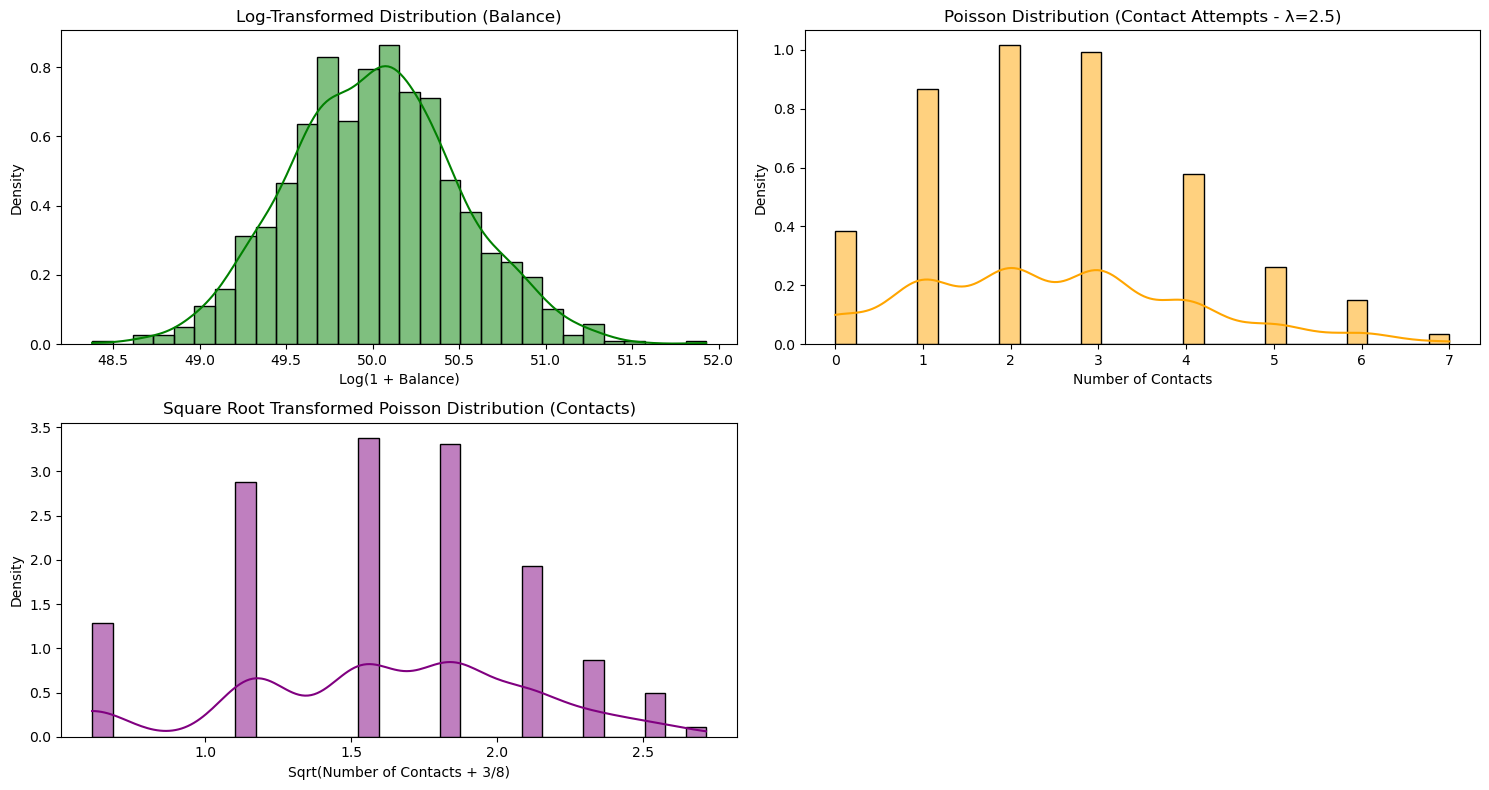

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
np.random.seed(42)

# Number of samples to generate
n = 1000

# 1. Log-transformation of Skewed Data (e.g., Balance)
balance_data = np.random.lognormal(mean=50, sigma=0.5, size=n)  # Log-normal data (balance)
balance_log_transformed = np.log(balance_data + 1)  # Log-transformation (avoid log(0))

# 2. Poisson Distribution and Square Root Transformation
lambda_poisson = 2.5
poisson_data = np.random.poisson(lambda_poisson, n)  # Poisson-distributed data
poisson_sqrt_transformed = np.sqrt(poisson_data + 3/8)  # Square root transformation

# Set up the figure
plt.figure(figsize=(15, 8))

# Plot Log-transformed Data
plt.subplot(2, 2, 1)
sns.histplot(balance_log_transformed, kde=True, color="green", bins=30, stat="density")
plt.title('Log-Transformed Distribution (Balance)')
plt.xlabel('Log(1 + Balance)')
plt.ylabel('Density')

# Plot Poisson Data and Square Root Transformation
plt.subplot(2, 2, 2)
sns.histplot(poisson_data, kde=True, color="orange", bins=30, stat="density")
plt.title(f'Poisson Distribution (Contact Attempts - λ={lambda_poisson})')
plt.xlabel('Number of Contacts')
plt.ylabel('Density')

plt.subplot(2, 2, 3)
sns.histplot(poisson_sqrt_transformed, kde=True, color="purple", bins=30, stat="density")
plt.title('Square Root Transformed Poisson Distribution (Contacts)')
plt.xlabel('Sqrt(Number of Contacts + 3/8)')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()